In [1]:
import pandas as pd

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
df = bank_marketing.data.original

df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [3]:
(df.isnull().sum()/len(df))*100

age             0.000000
job             0.637013
marital         0.000000
education       4.107407
default         0.000000
balance         0.000000
housing         0.000000
loan            0.000000
contact        28.798301
day_of_week     0.000000
month           0.000000
duration        0.000000
campaign        0.000000
pdays           0.000000
previous        0.000000
poutcome       81.747805
y               0.000000
dtype: float64

`poutcome` column has more than 80% of null values. It is better to drop that column and interpolate missing values with median for the remaining columns with null values

In [4]:
df.drop(columns=['poutcome'],axis=1,inplace=True)

df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'y'],
      dtype='object')

In [5]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
df = imputer.fit_transform(df)

In [6]:
df = pd.DataFrame(df,
                  columns=bank_marketing.data.original.columns)

df = df.astype(bank_marketing.data.original.dtypes.to_dict())

In [7]:
df[df.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,y


In [8]:
df.dtypes

age             int64
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day_of_week     int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
y              object
dtype: object

In [9]:
df.skew(numeric_only=True)

age             0.684818
balance         8.360308
day_of_week     0.093079
duration        3.144318
campaign        4.898650
pdays           2.615715
previous       41.846454
dtype: float64

In [10]:
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,no


In [11]:
df['job'].value_counts()

job
blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: count, dtype: int64

In [12]:
df['marital'].value_counts()

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

In [13]:
df['education'].value_counts()

education
secondary    25059
tertiary     13301
primary       6851
Name: count, dtype: int64

In [14]:
df['default'].value_counts()

default
no     44396
yes      815
Name: count, dtype: int64

In [15]:
df['housing'].value_counts()

housing
yes    25130
no     20081
Name: count, dtype: int64

In [16]:
df['loan'].value_counts()

loan
no     37967
yes     7244
Name: count, dtype: int64

In [17]:
df['contact'].value_counts()

contact
cellular     42305
telephone     2906
Name: count, dtype: int64

In [18]:
df['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [19]:
# converting y to numeric
y_map = {'yes':1,'no':0}
df['y'] = df['y'].apply(lambda x: y_map[x.strip().lower()])

In [20]:
df.corr(numeric_only=True)['y']

age            0.025155
balance        0.052838
day_of_week   -0.028348
duration       0.394521
campaign      -0.073172
pdays          0.103621
previous       0.093236
y              1.000000
Name: y, dtype: float64

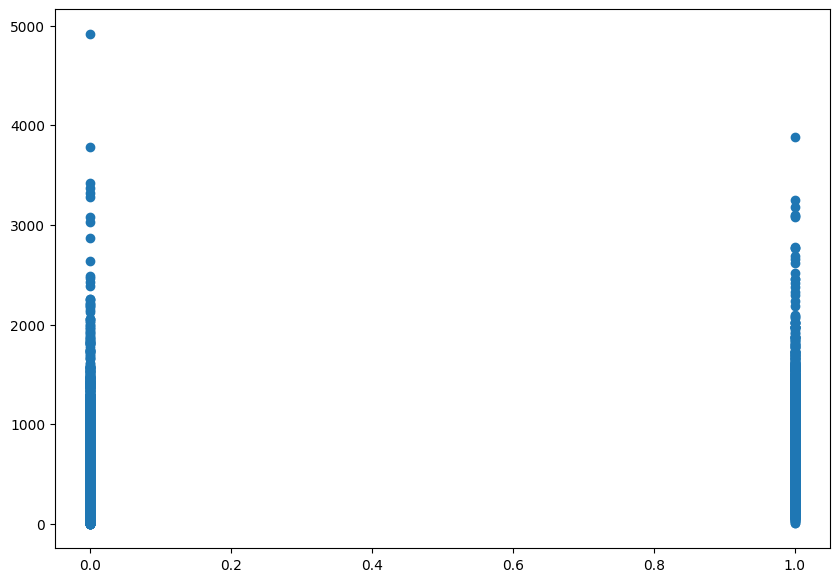

In [21]:
from matplotlib import pyplot as plt

# Figure Size
fig = plt.figure(figsize =(10, 7))

plt.scatter(df['y'],df['duration'])

# Show Plot
plt.show()

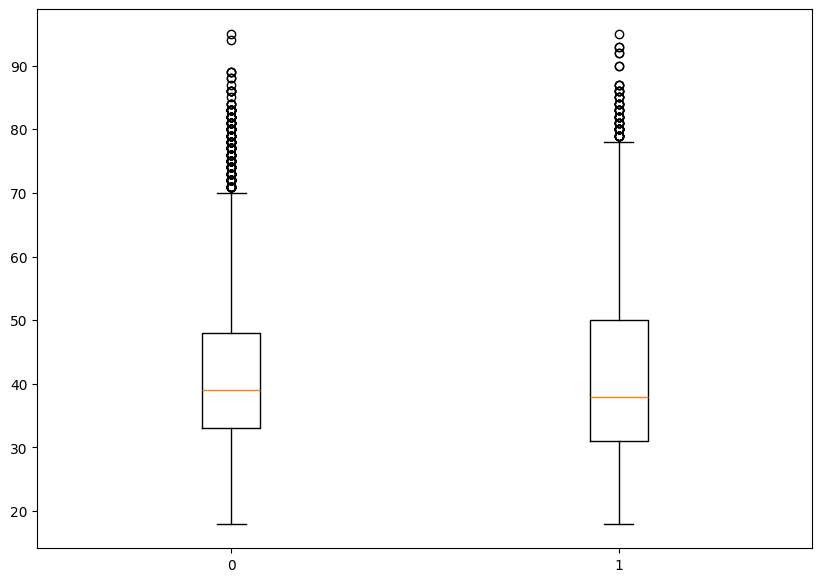

In [22]:
fig = plt.figure(figsize =(10, 7)) 
ax = fig.add_subplot(111)
bp = ax.boxplot([df[df['y']==0]['age'],df[df['y']==1]['age']])
ax.set_xticklabels(['0', '1'])
plt.show()

In [23]:
df.groupby(['job','y']).count()['age'].reset_index()

,job,y,age
0,admin.,0,4540
1,admin.,1,631
2,blue-collar,0,9278
3,blue-collar,1,742
4,entrepreneur,0,1364
5,entrepreneur,1,123
6,housemaid,0,1131
7,housemaid,1,109
8,management,0,8157
9,management,1,1301


In [24]:
df.groupby(['marital','y']).count()['age'].reset_index()

,marital,y,age
0,divorced,0,4585
1,divorced,1,622
2,married,0,24459
3,married,1,2755
4,single,0,10878
5,single,1,1912


In [25]:
df.groupby(['education','y']).count()['age'].reset_index()

,education,y,age
0,primary,0,6260
1,primary,1,591
2,secondary,0,22357
3,secondary,1,2702
4,tertiary,0,11305
5,tertiary,1,1996


In [26]:
df.groupby(['housing','y']).count()['age'].reset_index()

,housing,y,age
0,no,0,16727
1,no,1,3354
2,yes,0,23195
3,yes,1,1935


In [27]:
df.groupby(['loan','y']).count()['age'].reset_index()

,loan,y,age
0,no,0,33162
1,no,1,4805
2,yes,0,6760
3,yes,1,484


In [28]:
df.groupby(['default','y']).count()['age'].reset_index()

,default,y,age
0,no,0,39159
1,no,1,5237
2,yes,0,763
3,yes,1,52


In [29]:
df.groupby(['contact','y']).count()['age'].reset_index()

,contact,y,age
0,cellular,0,37406
1,cellular,1,4899
2,telephone,0,2516
3,telephone,1,390


(array([3.7516e+04, 2.2990e+03, 2.1540e+03, 1.8250e+03, 1.2290e+03,
        9.8000e+01, 3.9000e+01, 1.8000e+01, 1.8000e+01, 1.5000e+01]),
 array([ -1. ,  86.2, 173.4, 260.6, 347.8, 435. , 522.2, 609.4, 696.6,
        783.8, 871. ]),
 <BarContainer object of 10 artists>)

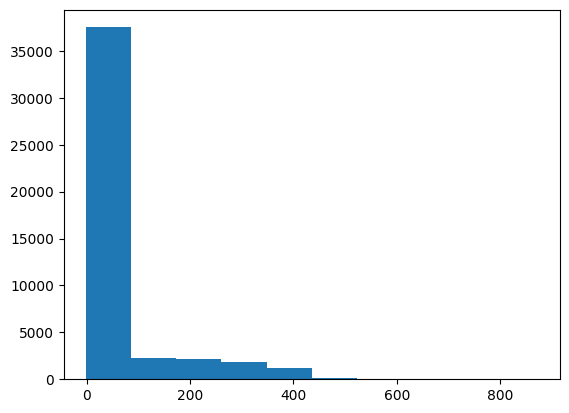

In [30]:
plt.hist(df['pdays'])

(array([3.9677e+04, 4.4250e+03, 8.6500e+02, 1.7600e+02, 4.3000e+01,
        1.1000e+01, 1.1000e+01, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   0. ,  491.8,  983.6, 1475.4, 1967.2, 2459. , 2950.8, 3442.6,
        3934.4, 4426.2, 4918. ]),
 <BarContainer object of 10 artists>)

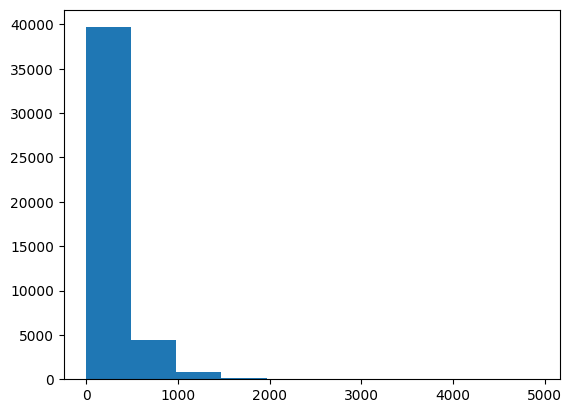

In [31]:
plt.hist(df['duration'])

(array([4.2882e+04, 1.6220e+03, 4.2000e+02, 1.6500e+02, 7.5000e+01,
        3.3000e+01, 7.0000e+00, 3.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([ 1. ,  7.2, 13.4, 19.6, 25.8, 32. , 38.2, 44.4, 50.6, 56.8, 63. ]),
 <BarContainer object of 10 artists>)

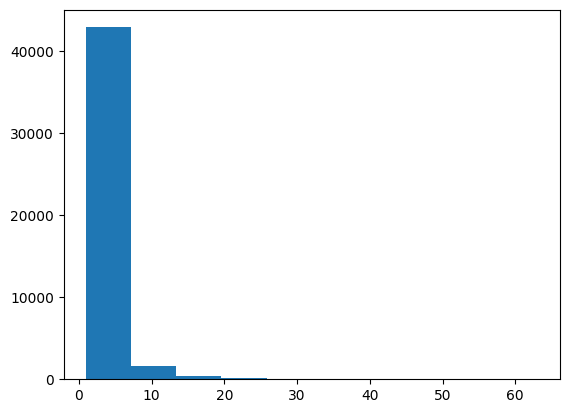

In [32]:
plt.hist(df['campaign'])

(array([ 1336., 11747., 12925.,  8015.,  7066.,  3312.,   377.,   303.,
          116.,    14.]),
 array([18. , 25.7, 33.4, 41.1, 48.8, 56.5, 64.2, 71.9, 79.6, 87.3, 95. ]),
 <BarContainer object of 10 artists>)

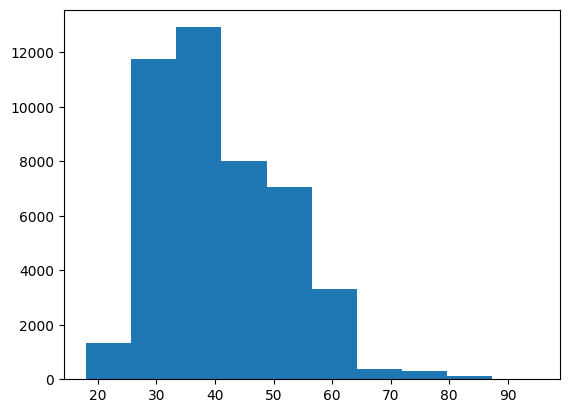

In [33]:
plt.hist(df['age'])

(array([3.9587e+04, 5.2330e+03, 2.9400e+02, 5.8000e+01, 2.1000e+01,
        7.0000e+00, 6.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([ -8019. ,   2995.6,  14010.2,  25024.8,  36039.4,  47054. ,
         58068.6,  69083.2,  80097.8,  91112.4, 102127. ]),
 <BarContainer object of 10 artists>)

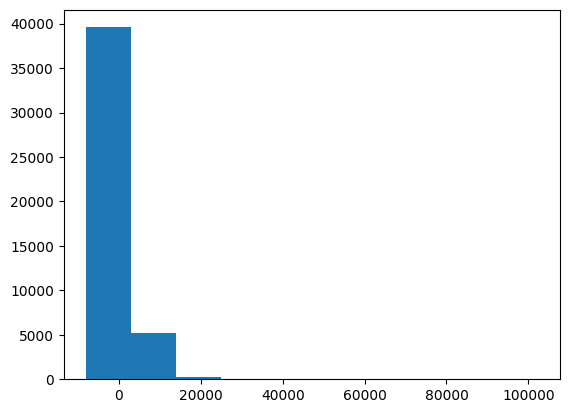

In [34]:
plt.hist(df['balance'])

(array([4.519e+04, 1.800e+01, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  0. ,  27.5,  55. ,  82.5, 110. , 137.5, 165. , 192.5, 220. ,
        247.5, 275. ]),
 <BarContainer object of 10 artists>)

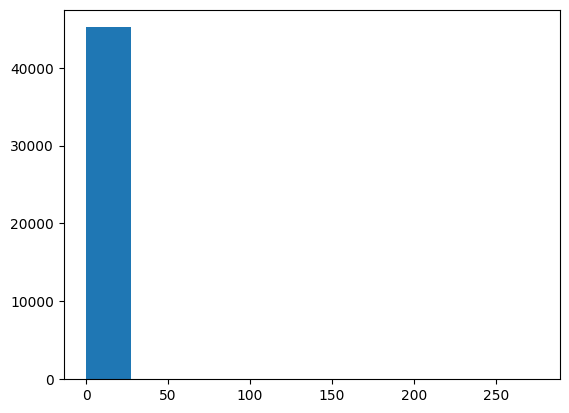

In [35]:
plt.hist(df['previous'])

In [36]:
for col in df.select_dtypes(include='object'):
    print(str(col) + ":" + str(df[col].nunique()))

job:11
marital:3
education:3
default:2
housing:2
loan:2
contact:2
month:12


In [42]:
df.groupby(['month','y']).count()['age'].reset_index().sort_values(by=['y','age'],ascending=[False,False])

,month,y,age
17,may,1,925
3,aug,1,688
11,jul,1,627
1,apr,1,577
13,jun,1,546
7,feb,1,441
19,nov,1,403
21,oct,1,323
23,sep,1,269
15,mar,1,248


In [41]:
df.groupby(['day_of_week','y']).count()['age'].reset_index().sort_values(by=['y','age'],ascending=[False,False]).head(20)

,day_of_week,y,age
59,30,1,271
23,12,1,244
25,13,1,241
29,15,1,238
7,4,1,230
35,18,1,228
9,5,1,215
27,14,1,210
15,8,1,201
41,21,1,201


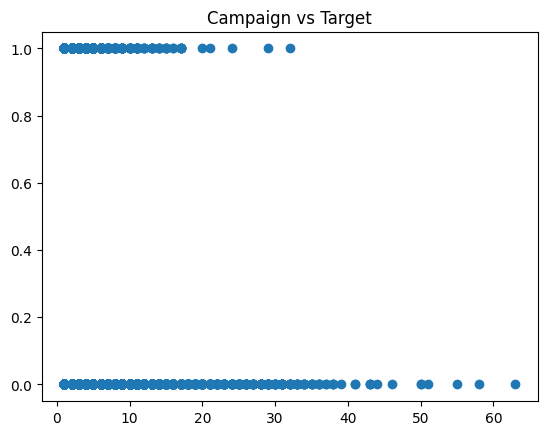

In [49]:
plt.scatter(df['campaign'], df['y'])
plt.title('Campaign vs Target')
plt.show()

In [52]:
df['campaign_binned'] = pd.cut(df['campaign'], bins=8)  # Divide campaign into 5 bins

# Group by the binned 'campaign' column and calculate mean of the target
df.groupby('campaign_binned')['y'].mean()


/var/folders/jm/jkj24z8n52sdr5w8dvb59kvc0000gp/T/ipykernel_97229/4053513734.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('campaign_binned')['y'].mean()


campaign_binned
(0.938, 8.75]    0.119916
(8.75, 16.5]     0.053064
(16.5, 24.25]    0.029316
(24.25, 32.0]    0.018868
(32.0, 39.75]    0.000000
(39.75, 47.5]    0.000000
(47.5, 55.25]    0.000000
(55.25, 63.0]    0.000000
Name: y, dtype: float64

Since the value of y is decreasing steadily, it indicates there could be a continuous relationship between y and campaign (the same would hold true if it were increasing steadily). This is also confirmed in the correlation analysis where we can see a value of -0.073172 

In [56]:
df['age_binned'] = pd.cut(df['age'], bins=10)  # Divide campaign into 5 bins

# Group by the binned 'campaign' column and calculate mean of the target
df.groupby('age_binned')['y'].mean()


/var/folders/jm/jkj24z8n52sdr5w8dvb59kvc0000gp/T/ipykernel_97229/1456321155.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_binned')['y'].mean()


age_binned
(17.923, 25.7]    0.239521
(25.7, 33.4]      0.124457
(33.4, 41.1]      0.100193
(41.1, 48.8]      0.090580
(48.8, 56.5]      0.091707
(56.5, 64.2]      0.150060
(64.2, 71.9]      0.392573
(71.9, 79.6]      0.455446
(79.6, 87.3]      0.413793
(87.3, 95.0]      0.500000
Name: y, dtype: float64

In [55]:
df['day_of_week_binned'] = pd.cut(df['day_of_week'], bins=10)  # Divide campaign into 5 bins

# Group by the binned 'campaign' column and calculate mean of the target
df.groupby('day_of_week_binned')['y'].mean()


/var/folders/jm/jkj24z8n52sdr5w8dvb59kvc0000gp/T/ipykernel_97229/2970343657.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('day_of_week_binned')['y'].mean()


day_of_week_binned
(0.97, 4.0]     0.164291
(4.0, 7.0]      0.097720
(7.0, 10.0]     0.127578
(10.0, 13.0]    0.142704
(13.0, 16.0]    0.128876
(16.0, 19.0]    0.087608
(19.0, 22.0]    0.096252
(22.0, 25.0]    0.144205
(25.0, 28.0]    0.102609
(28.0, 31.0]    0.112797
Name: y, dtype: float64